In [3]:
import matplotlib.pyplot as plt
import pandas as pd

# 데이터 저장 위치
data_home = 'http://github.com/dknife/ML/raw/main/data/'
lin_data = pd.read_csv(data_home+'pollution.csv') 
print(lin_data)
# inpux : x => 종속항, pollition : y => 독립항

       input  pollution
0   0.240557   4.858750
1   0.159731   4.471091
2   0.108295   4.341897
3   0.233770   3.586844
4   0.283235   3.678243
..       ...        ...
95  0.070824   4.851617
96  0.055300   4.912696
97  0.138229   5.516441
98  0.007205   5.661260
99  0.290294   3.169049

[100 rows x 2 columns]


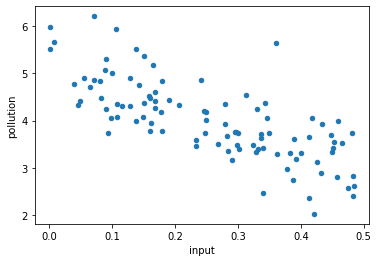

In [6]:
lin_data.plot(kind = 'scatter', x = 'input', y = 'pollution')
# 투입량(X)이 늘이면 오염도(y)가 줄어드는 경향이 있다는 것을 알 수 있다.

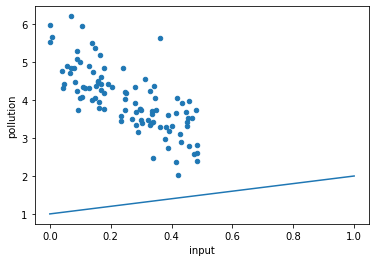

In [7]:
# 가설에 따라 입력 x에 대해 y의 추정치를 계산하는 함수를 h()
w, b = 1, 1
x0, x1 = 0.0, 1.0 # x0 = x축, x1 = y축 / y = wx+b에서 y는 x1 x는 x0이 됨
def h(x, w, b): # 가설에 따라 값을 계산하는 함수
  return w*x + b

# 데이터(산포도)와 가설(직선)을 비교
lin_data.plot(kind = 'scatter', x = 'input', y = 'pollution')
plt.plot([x0, x1], [h(x0, w, b), h(x1, w, b)])


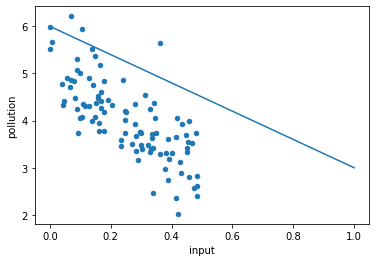

In [8]:
# 데이터와 일치시키기 위해서는 음수 기울기가 필요할 것이고, 절편이 대략 6 정도 되여야 할 거 같다. w = -3, b =6을 주고 가설을 그려봄.
w, b = -3, 6
x0, x1 = 0.0, 1.0

# 새로운 파라미터로 데이터(산포도)와 가설(직선)을 비교
lin_data.plot(kind = 'scatter', x = 'input', y = 'pollution')
plt.plot([x0, x1], [h(x0, w, b), h(x1, w, b)])

In [ ]:
# 좋은 가설과 모델의 오차
# 좋은 가설이라면 데이터가 이 직선들 근처에 있을 것이다.
# 대표적인 오차 척도는 평균 제곱 오차(mean square erro = MSE) 

In [10]:
# 예측 결과가 y_hat, 정답 레이블이 y에 저장되어 있다고 할 때, 평균 제곱 오차
# 평균 제곱 오차 MSE
import numpy as np
y_hat = np.array([1.2, 2.1, 2.9, 4.1, 4.7, 6.3, 7.1, 7.7, 8.5, 10.1])
y = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
diff_square = (y_hat-y)**2 
e_mse = diff_square.sum() / len(y)
e_mse 

0.06099999999999996

In [11]:
# 평균 제곱 오차 (MSE)는 기계학습에서 가장 흔히 사용되는 오차 척도
# 사이킷런은 기계 학습의 대표적인 패키지

from sklearn.metrics import mean_squared_error
print('Mean squared error:', mean_squared_error(y_hat, y))

Mean squared error: 0.06099999999999996


In [12]:
# 제곱을 하지 않고 오차를 더하는 방법 => 평균 절대 오차 (mean absolute erro = MAE) 
from sklearn.metrics import mean_absolute_error
print('Mean absolute error:', mean_absolute_error(y_hat, y))

Mean absolute error: 0.20999999999999988


In [13]:
# 선형 회귀 함수의 시각적 이해
# 아래 코드 설명 : 5개의 점이 분포하고 있는데 이 분포를 가장 잘 설명하는 y = f(x)의 함수를 찾는 것이 바로 선형 회귀의 목적
# y = wx와 같이 y 절편이 0인 경우를 가정하고 최적의 w 값을 찾는 과정

import numpy as np
from sklearn.metrics import mean_squared_error as mse

# 5개 점의 x, y 좌표값
x = np.array([1, 4.5, 9, 10, 13])
y = np.array([0, 0.2, 2.5, 5.4, 7.3])

w_list = np.arange(1.0, 0.2, -0.1) #시작점, 끝점, 변화값 (1에서 0.2까지 -0.1씩 w를 바꿔가면서 정답의 오차 비교)
for w in list(w_list): # w를 바꾸어가며 예측치와 정답의 오차 비교
  y_hat = w*x
  print('w = {:.1f}, 평균제곱 오차: {:.2f}'.format(w,mse(y_hat,y)))

w = 1.0, 평균제곱 오차: 23.08
w = 0.9, 평균제곱 오차: 15.86
w = 0.8, 평균제곱 오차: 10.13
w = 0.7, 평균제곱 오차: 5.89
w = 0.6, 평균제곱 오차: 3.13
w = 0.5, 평균제곱 오차: 1.85
w = 0.4, 평균제곱 오차: 2.06
w = 0.3, 평균제곱 오차: 3.75


In [ ]:
# w가 0.5일때 평균 제곱 오차가 가장 작은 값을 가지는 것을 알 수 있음

In [14]:
# 가설에 대한 오차 구하기
w, b = -3,6 # w, b가 -3, 6일 때 h() 함수를 y^hat 함수로 가정
x = lin_data['input'].to_numpy()
y = lin_data['pollution'].to_numpy()
y_pred = h(x, w, b)
error = (y_pred - y)
error

array([ 0.4195784 ,  1.04971677,  1.33321941,  1.71184524,  1.47205094,
        1.29651981,  0.90796599,  1.60479092,  0.43274803,  1.34273875,
        1.04704019,  0.17173389,  1.62983969,  2.71606203,  0.76239547,
        0.81910416,  1.68277334,  1.84517464,  1.83123493,  1.05999343,
        1.54915161,  1.62613855,  1.35757149,  0.9559527 ,  0.69384839,
        1.43756403,  1.00967404,  0.68616603,  1.73449862,  1.23144237,
        2.00034361,  1.34951392,  0.32087407, -0.2647334 ,  1.97698033,
        1.18131751,  1.72325619,  1.80163473, -0.42384495,  1.27631632,
        1.07877757,  0.64225129,  1.22905797,  1.07590731,  1.55013999,
        0.76691574,  1.67240252,  1.10559534,  1.27540987, -0.73003295,
        1.27263587,  1.63061935,  1.35614568,  1.58218579,  2.39535838,
        1.48261159,  1.524646  ,  1.60174464,  0.47302039,  1.09862732,
        1.22260149,  1.56899704,  0.02277376,  2.1449076 ,  1.47727095,
        1.8862379 ,  1.21790966,  2.51660705,  1.23173843,  0.61

In [ ]:
# 최소 제곱법(LSA)은 오차를 제곱하여 오차 곡면의 기울기를 따라 내려가 기울기가 0인 극소 지점을 찾는 것.

In [15]:
#벡터화 연산을 사용한 직선의 기울기와 절편 갱신

learning_rate = 0.005 #하이퍼파라미터
w = w-learning_rate * (error * x).sum()
b = b-learning_rate * error.sum()

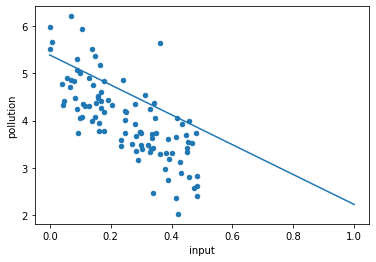

In [16]:
lin_data.plot(kind = 'scatter', x = 'input', y = 'pollution')
plt.plot([x0, x1], [h(x0, w, b), h(x1, w, b)])